# PROJECT 2

## Importing Libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  Loading Datasets   

In [2]:
Train_Data=pd.read_csv("C:\\Users\\me\\Downloads\\Train.csv")
Riders_Data=pd.read_csv("C:\\Users\\me\\Downloads\\Riders.csv")

## Merging Datasets 

In [3]:
Complete_Dataset=Train_Data.merge(Riders_Data, on='Rider Id')

In [4]:
Complete_Dataset.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


#  

## EDA 

## Grouping Data by Placement Day of Month  

In [5]:
Placement_Day_Grouped=Complete_Dataset.groupby(['Placement - Day of Month'], as_index=False).mean()

In [6]:
PDG=Placement_Day_Grouped[['Placement - Day of Month','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [7]:
PDG['Time from Pickup to Arrival']=PDG['Time from Pickup to Arrival']/60

## Graphical Representation of ETA on Various days  

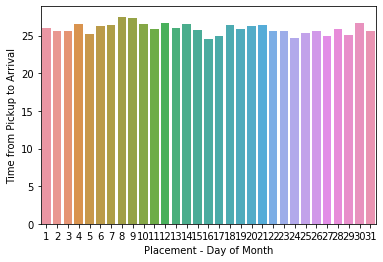

In [8]:
sns.barplot(x='Placement - Day of Month',y='Time from Pickup to Arrival',data=PDG)

### From the above data, it is obvious that the average ETA for the various placement days are not significantly different 

### Grouping Data by Placement Weekday  

In [9]:
Placement_Weekday_Grouped=Complete_Dataset.groupby(['Placement - Weekday (Mo = 1)'], as_index=False).mean()

In [10]:
PWG=Placement_Weekday_Grouped[['Placement - Weekday (Mo = 1)','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

### On the average, it takes much time to deliver on orders placed on Sundays and Fridays. Placements on Mondays and Saturdays are faster. 

##  

## Grouping Data by Confirmation Day of Month

In [11]:
Confirmation_Day_Grouped=Complete_Dataset.groupby(['Confirmation - Day of Month'], as_index=False).mean()

In [12]:
CDG=Confirmation_Day_Grouped[['Confirmation - Day of Month','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [13]:
CDG

,Confirmation - Day of Month,Time from Pickup to Arrival
7,8,1650.161557
8,9,1636.578711
29,30,1602.392157
11,12,1596.331832
9,10,1589.863188
13,14,1589.348259
3,4,1589.240572
20,21,1587.523883
6,7,1584.419708
17,18,1583.092208


### From the above data, it is obvious that the average ETA for the various confirmation days are not significantly different. 

### Grouping Data by Confirmation Weekday 

In [14]:
Confirmation_Weekday_Grouped=Complete_Dataset.groupby(['Confirmation - Weekday (Mo = 1)'], as_index=False).mean()

In [15]:
CWG=Confirmation_Weekday_Grouped[['Confirmation - Weekday (Mo = 1)','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [16]:
CWG

,Confirmation - Weekday (Mo = 1),Time from Pickup to Arrival
6,7,1683.032258
4,5,1595.178813
1,2,1590.174792
2,3,1573.379545
3,4,1556.176638
0,1,1495.779303
5,6,1445.685200


### On the average, it takes much time to deliver on orders confirmed on Sundays and Fridays. Placements on Mondays and Saturdays are faster. 

#  

In [17]:
Pickup_Day_Grouped=Complete_Dataset.groupby(['Pickup - Day of Month'], as_index=False).mean()           

In [18]:
PkDG=Pickup_Day_Grouped[['Pickup - Day of Month','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [19]:
PkDG

,Pickup - Day of Month,Time from Pickup to Arrival
7,8,1650.161557
8,9,1636.578711
29,30,1602.392157
11,12,1596.331832
9,10,1589.863188
13,14,1589.348259
3,4,1589.240572
20,21,1587.523883
6,7,1584.419708
17,18,1583.092208


#  

In [20]:
Pickup_Weekday_Grouped=Complete_Dataset.groupby(['Pickup - Weekday (Mo = 1)'], as_index=False).mean()

In [21]:
PkWG=Pickup_Weekday_Grouped[['Pickup - Weekday (Mo = 1)','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [22]:
PkWG

,Pickup - Weekday (Mo = 1),Time from Pickup to Arrival
6,7,1683.032258
4,5,1595.178813
1,2,1590.174792
2,3,1573.379545
3,4,1556.176638
0,1,1495.779303
5,6,1445.685200


#  

## Grouping by Platform type

In [23]:
Platform_Grouped=Complete_Dataset.groupby(['Platform Type'], as_index=False).mean()

In [24]:
Platform_Type=Platform_Grouped[['Platform Type','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [25]:
Platform_Type

,Platform Type,Time from Pickup to Arrival
3,4,1675.150000
0,1,1572.799721
2,3,1555.773402
1,2,1540.861224


### Clients on platform 4 have their orders delivered late. Clients on platform 2 get their deliveries faster.

#  

## Grouping by Personal or Business

In [26]:
Personal_Business_Grouped=Complete_Dataset.groupby(['Personal or Business'], as_index=False).mean()

In [27]:
PBG=Personal_Business_Grouped[['Personal or Business','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [28]:
PBG

,Personal or Business,Time from Pickup to Arrival
1,Personal,1585.056327
0,Business,1550.743270


#  

Business orders are delivered faster than personal orders

## Grouping by Personal or Business for Distance 

In [29]:
Personal_Business_Distance=Complete_Dataset.groupby(['Personal or Business'], as_index=False).mean()

In [30]:
PBD=Personal_Business_Distance[['Personal or Business','Distance (KM)']].sort_values('Distance (KM)',ascending=False)

In [31]:
PBD

,Personal or Business,Distance (KM)
0,Business,9.525598
1,Personal,9.419701


An average distance of 9.5km is covered in delivering Business orders and 9.4 for Personal orders

#  

## Correlation Matrix for Data 

Selecting only numeric data 

In [32]:
Numeric_Data=Complete_Dataset._get_numeric_data()
Numeric_Data.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,9,5,9,5,9,5,9,5,9,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,18,5,18,5,18,5,18,5,18,...,NaN,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549
2,3,31,5,31,5,31,5,31,5,31,...,NaN,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549
3,3,2,2,2,2,2,2,2,2,2,...,NaN,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549
4,2,22,2,22,2,22,2,22,2,22,...,NaN,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549


In [33]:
Numeric_Data.corr()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,...,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827,0.024060,-0.074029,-0.014664,-0.031886
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,...,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710,0.008096,-0.000107,0.012790,-0.001709
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,...,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693,-0.024226,-0.015475,-0.006834,-0.025747
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768
Arrival at Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712
Arrival at Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768
Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712
Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768
Arrival at Destination - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712


Plotting a heatmap to give a better presentation

Text(0.5, 1.05, 'Correlation Matrix')

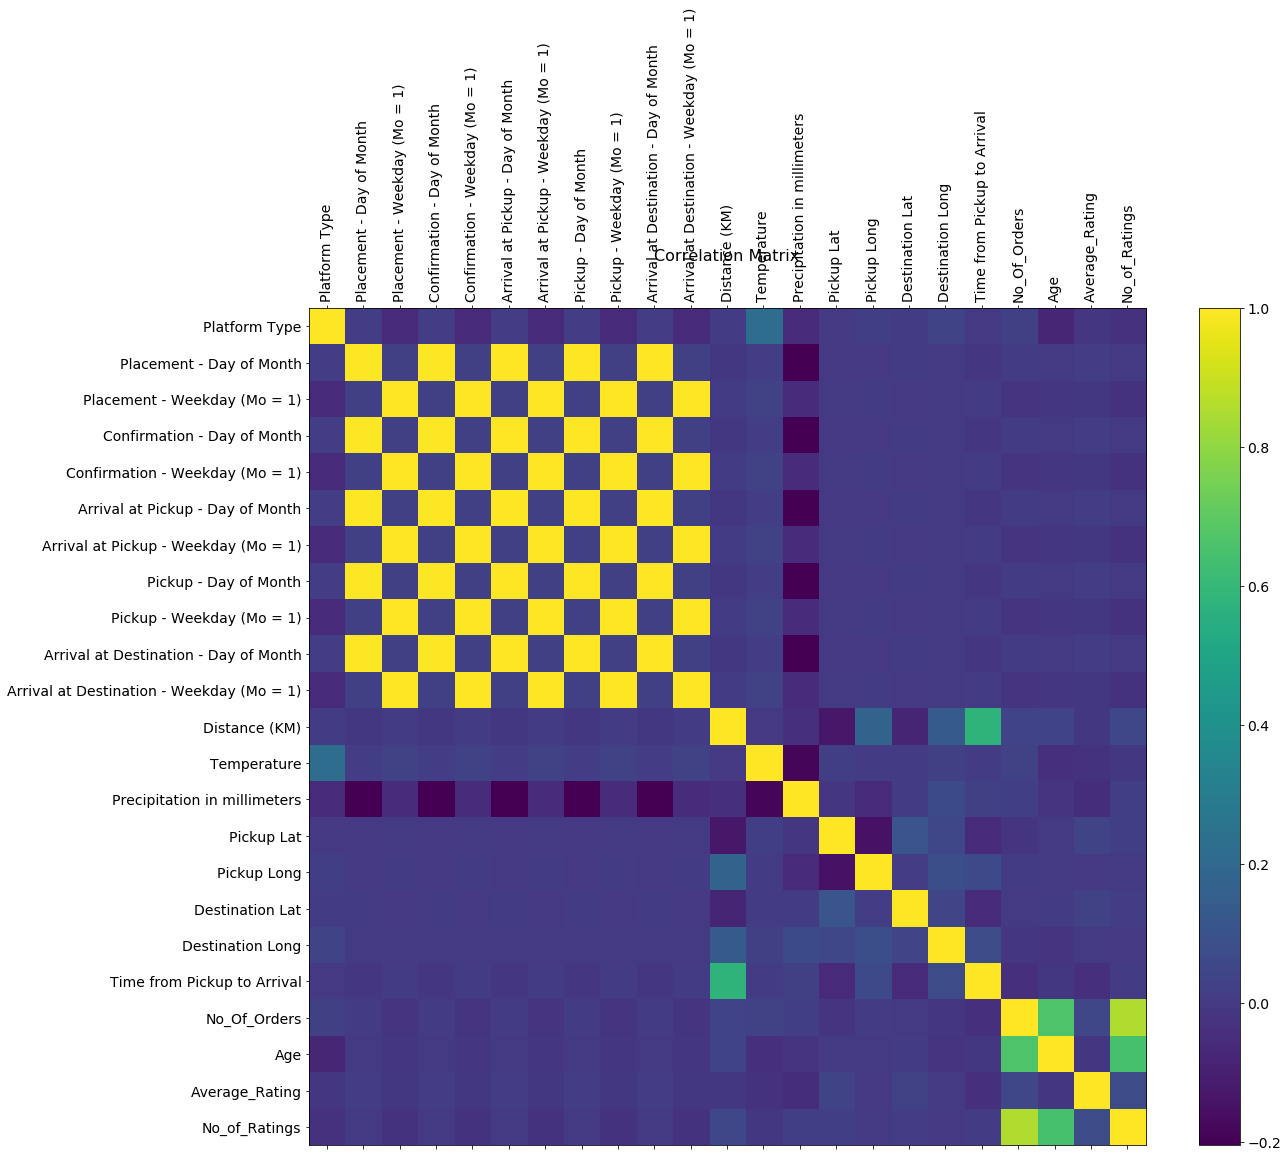

In [34]:
f=plt.figure(figsize=(19,15))
plt.matshow(Numeric_Data.corr(), fignum=f.number)
plt.xticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14, rotation=90)
plt.yticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

It can be seen that, placement weekday have a higher correlation with confirmation, pickup and arrival at pick up weekdays. This is same for day of month and time. Number of orders also has a high correlation with number of ratings.

#  

## Plotting a boxplot for Temperature and Precipitation

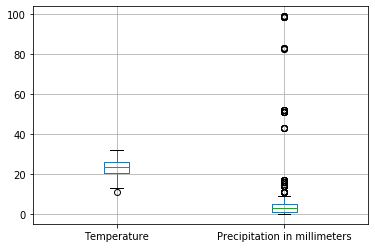

In [35]:
Numeric_Data.boxplot(column=['Temperature','Precipitation in millimeters'])

Precipitation has a lot of outliers with a first quartile of zero and a median less than 10. Temperature has a median above 20 and an upper quartile a little above 30.

## KDE plot for age, Average_Rating and Arrival at Destination - Weekday 

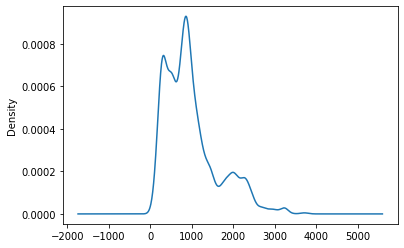

In [36]:
Numeric_Data.Age.plot.kde()

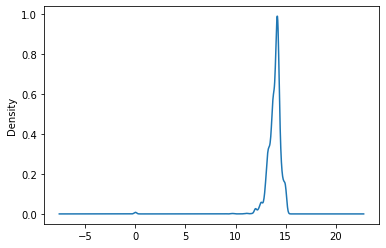

In [37]:
Numeric_Data.Average_Rating.plot.kde()

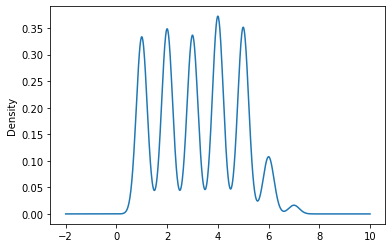

In [38]:
Numeric_Data['Arrival at Destination - Weekday (Mo = 1)'].plot.kde()

#  

## Summary Statistics for Features 

In [39]:
Complete_Dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order No,21201,21201,Order_No_3140,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User Id,21201,3186,User_Id_393,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Type,21201,1,Bike,21201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform Type,21201,NaN,NaN,NaN,2.75218,0.625178,1,3,3,3,4
Personal or Business,21201,2,Business,17384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Placement - Day of Month,21201,NaN,NaN,NaN,15.6537,8.79892,1,8,15,23,31
Placement - Weekday (Mo = 1),21201,NaN,NaN,NaN,3.24008,1.5673,1,2,3,5,7
Placement - Time,21201,15686,2:57:22 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmation - Day of Month,21201,NaN,NaN,NaN,15.6538,8.79889,1,8,15,23,31
Confirmation - Weekday (Mo = 1),21201,NaN,NaN,NaN,3.24022,1.56723,1,2,3,5,7


## Checking for missing values in the dataset 

In [40]:
Complete_Dataset.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

Temperature and Precipitation have 4,366 and 20,649 missing values respectively. The remaining features has no missing values.These missing values are for continuous features

## Representing this in Percentage

In [41]:
Complete_Dataset.isnull().mean().round(4) * 100

Order No                                      0.00
User Id                                       0.00
Vehicle Type                                  0.00
Platform Type                                 0.00
Personal or Business                          0.00
Placement - Day of Month                      0.00
Placement - Weekday (Mo = 1)                  0.00
Placement - Time                              0.00
Confirmation - Day of Month                   0.00
Confirmation - Weekday (Mo = 1)               0.00
Confirmation - Time                           0.00
Arrival at Pickup - Day of Month              0.00
Arrival at Pickup - Weekday (Mo = 1)          0.00
Arrival at Pickup - Time                      0.00
Pickup - Day of Month                         0.00
Pickup - Weekday (Mo = 1)                     0.00
Pickup - Time                                 0.00
Arrival at Destination - Day of Month         0.00
Arrival at Destination - Weekday (Mo = 1)     0.00
Arrival at Destination - Time  

For Temperature, 20.59% of its observations are missing. Precipitation has 97.4% of its data missing.

Since only 21% of temperature data is missing, we will impute it with the mean. Precipitation will be dropped because using the mean of 3.7% data to replace the missing value might not give the true representation. 

## Replacing missing values in Temperature with its mean

In [42]:
Complete_Dataset['Temperature'] = Complete_Dataset['Temperature'].fillna(Complete_Dataset['Temperature'].mean())

## Dropping Precipitation from dataset

In [43]:
Complete_Dataset=Complete_Dataset.drop(['Precipitation in millimeters'],axis=True)

#  

## Creating New Features 

#### Making a copy of the complete dataset. The complete dataset will be needed for the regression without the new features 

In [53]:
Data_With_New_Features = Complete_Dataset.copy()

In [54]:
Data_With_New_Features.shape

(21201, 32)

### Creating new feature, Placement Period of Day

Converting Placement time to a timestamp

In [55]:
from datetime import datetime
Data_With_New_Features['Placement - Time'] = Data_With_New_Features['Placement - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))

Extracting hour of timestamp

In [56]:
Data_With_New_Features['Placement Period of day'] = Data_With_New_Features['Placement - Time'].dt.hour

Categorizing hours of the day into Morning, Afternoon and Evening

In [57]:
# Create a list to store the data
P_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Placement Period of day']:
    if (hour<12):
         P_period.append('Morning')
    elif (hour>12 & hour<16):
         P_period.append('Afternoon')
    else:
         P_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Placement Period of day'] = P_period

##  Creating Confirmation Period of Day

In [58]:
Data_With_New_Features['Confirmation - Time'] = Data_With_New_Features['Confirmation - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Data_With_New_Features['Confirmation Period of day'] = Data_With_New_Features['Confirmation - Time'].dt.hour
# Create a list to store the data
C_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Confirmation Period of day']:
    if (hour<12):
         C_period.append('Morning')
    elif (hour>12 & hour<16):
         C_period.append('Afternoon')
    else:
         C_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Confirmation Period of day'] = C_period

## Creating Arrival at Pickup Period of Day 

In [59]:
Data_With_New_Features['Arrival at Pickup - Time'] = Data_With_New_Features['Arrival at Pickup - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Data_With_New_Features['Arrival at Pickup Period of day'] = Data_With_New_Features['Arrival at Pickup - Time'].dt.hour
# Create a list to store the data
A_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Arrival at Pickup Period of day']:
    if (hour<12):
         A_period.append('Morning')
    elif (hour>12 & hour<16):
         A_period.append('Afternoon')
    else:
         A_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Arrival at Pickup Period of day'] = A_period

## Creating Arrival at Destination Period of Day 

In [60]:
Data_With_New_Features['Arrival at Destination - Time'] = Data_With_New_Features['Arrival at Destination - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Data_With_New_Features['Arrival at Destination Period of day'] = Data_With_New_Features['Arrival at Destination - Time'].dt.hour
# Create a list to store the data
D_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Arrival at Destination Period of day']:
    if (hour<12):
         D_period.append('Morning')
    elif (hour>12 & hour<16):
         D_period.append('Afternoon')
    else:
         D_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Arrival at Destination Period of day'] = D_period

## Creating Pickup Period of Day

In [61]:
Data_With_New_Features['Pickup - Time'] = Data_With_New_Features['Pickup - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Data_With_New_Features['Pickup Period of day'] = Data_With_New_Features['Pickup - Time'].dt.hour
# Create a list to store the data
Pk_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Pickup Period of day']:
    if (hour<12):
         Pk_period.append('Morning')
    elif (hour>12 & hour<16):
         Pk_period.append('Afternoon')
    else:
         Pk_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Pickup Period of day'] = Pk_period

## Categorizing days into Weekdays and Weekends for Day Variables

In [62]:
Data_With_New_Features['Placement day'] = np.where(Data_With_New_Features['Placement - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Data_With_New_Features['Confirmation day'] = np.where(Data_With_New_Features['Confirmation - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Data_With_New_Features['Pickup day'] = np.where(Data_With_New_Features['Pickup - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Data_With_New_Features['Arrival at Destination day'] = np.where(Data_With_New_Features['Arrival at Destination - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Data_With_New_Features['Arrival at Pickup day'] = np.where(Data_With_New_Features['Arrival at Pickup - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')

## Computing for proximity of The Nairobi Central Business District to the Pick up and Destination points

### For Pick up point

In [63]:
# importing geodesic from geopy 
from geopy.distance import geodesic

#Creating a column for CBD proximity and populating it with Nan
Data_With_New_Features['CBD Proximity to Pickup Point']=np.nan

# Latitude and longitude for Central Business District (Taken online)
CBD=(-1.299719,36.816097)

# Iterating through Data to compute for Distance(km)
for i, row in Data_With_New_Features.iterrows():
    Data_With_New_Features.loc[i, 'CBD Proximity to Pickup Point'] = geodesic((Data_With_New_Features.loc[i, 'Pickup Lat'],Data_With_New_Features.loc[i, 'Pickup Long']),CBD).km 

### For Destination

In [64]:
# importing geodesic from geopy 
from geopy.distance import geodesic

#Creating a column for CBD proximity and populating it with Nan
Data_With_New_Features['CBD Proximity to Destination']=np.nan

# Latitude and longitude for Central Business District (Taken online)
CBD=(-1.299719,36.816097)

# Iterating through Data to compute for Distance(km)
for i, row in Data_With_New_Features.iterrows():
    Data_With_New_Features.loc[i, 'CBD Proximity to Destination'] = geodesic((Data_With_New_Features.loc[i, 'Destination Lat'],Data_With_New_Features.loc[i, 'Destination Long']),CBD).km

## Categorizing Temperature into favourable and unfavourable (20-29 Degree Celcius being favourable)

In [65]:
Temp_Cat=[]

# Using a for loop to populate the list
for temp in Data_With_New_Features['Temperature']:
    if (temp>20 and temp<29):
         Temp_Cat.append('Favourable')
    else:
         Temp_Cat.append('Unfavourable')

# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Temperature Condition'] = Temp_Cat

## Categorizing Day of month into 1st, 2nd, 3rd and 4th week

### For Placement Day of Month 

In [66]:
# Create a list to store the data
PDM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Placement - Day of Month']:
    if (day>0 and day<8):
        PDM.append('Week One')        
    elif (day>7 and day<16):
        PDM.append('Week Two')
    elif (day>15 and day<24):
        PDM.append('Week Three')
    else:
        PDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Placement Week'] = PDM

### For Confirmation Day of Month 

In [67]:
# Create a list to store the data
CDM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Confirmation - Day of Month']:
    if (day>0 and day<8):
        CDM.append('Week One')        
    elif (day>7 and day<16):
        CDM.append('Week Two')
    elif (day>15 and day<24):
        CDM.append('Week Three')
    else:
        CDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Confirmation Week'] = CDM

### For Arrival at Pickup Day of Month 

In [68]:
# Create a list to store the data
ADM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Arrival at Pickup - Day of Month']:
    if (day>0 and day<8):
        ADM.append('Week One')        
    elif (day>7 and day<16):
        ADM.append('Week Two')
    elif (day>15 and day<24):
        ADM.append('Week Three')
    else:
        ADM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Arrival at Pickup Week'] = ADM

### For Pickup Day of Month 

In [69]:
# Create a list to store the data
PkDM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Pickup - Day of Month']:
    if (day>0 and day<8):
        PkDM.append('Week One')        
    elif (day>7 and day<16):
        PkDM.append('Week Two')
    elif (day>15 and day<24):
        PkDM.append('Week Three')
    else:
        PkDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Pickup Week'] = PkDM

## For Arrival at Destination Day of Month 

In [70]:
# Create a list to store the data
AdDM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Arrival at Destination - Day of Month']:
    if (day>0 and day<8):
        AdDM.append('Week One')        
    elif (day>7 and day<16):
        AdDM.append('Week Two')
    elif (day>15 and day<24):
        AdDM.append('Week Three')
    else:
        AdDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Arrival at Destination Week'] = AdDM

### Checking to see the average delivery time for weekdays and weekends for Placement of order

In [71]:
Weekend_Weekday_Grouped=Data_With_New_Features.groupby(['Placement day'], as_index=False).mean()
Weekend_Weekday_Grouped[['Placement day','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

,Placement day,Time from Pickup to Arrival
0,Weekday,1562.609337
1,Weekend,1477.017033


From the table above, orders placed on Weekends are delivered faster as compared to order placements made on weekdays.

## Checking to see the average delivery time for weeks of month for pick ups

In [72]:
Pickup_Week_Grouped=Data_With_New_Features.groupby(['Pickup Week'], as_index=False).mean()
Pickup_Week_Grouped[['Pickup Week','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

,Pickup Week,Time from Pickup to Arrival
3,Week Two,1589.452235
1,Week One,1558.922781
2,Week Three,1544.737104
0,Week Four,1529.274536


In [73]:
Placement_Day_Period_Grouped=Data_With_New_Features.groupby(['Placement Period of day'], as_index=False).mean()
Placement_Day_Period_Grouped[['Placement Period of day','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

,Placement Period of day,Time from Pickup to Arrival
1,Evening,1590.595861
0,Afternoon,1555.835951
2,Morning,1547.357776


Orders placed in the evening are delivered later than other periods of the day. Morning orders has the least ETA.

## Regression Analysis 

### Without New Features 

#### Dropping order Id, User Id, Vehicle type, Rider Id, all time data  and all latitude and longitude data

In [74]:
Data_without_New_Features=Complete_Dataset.drop(["Order No", "User Id","Vehicle Type","Rider Id","Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time", "Arrival at Destination - Time","Pickup Lat", "Pickup Long", "Destination Lat", "Destination Long"], axis = 1)              

### One hot encoding all object variables in the data without new features

##### Selecting object data for encoding 

In [75]:
Object_Data_without_New_Features=Data_without_New_Features['Personal or Business']

#### Encoding Object Data 

In [76]:
Dummies_Data_without_New_Features= pd.get_dummies(Object_Data_without_New_Features)

In [77]:
Dummies_Data_without_New_Features.head()

,Business,Personal
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


#### Merging encoded data with original data

In [78]:
Data_without_New_Features = pd.concat([Data_without_New_Features, Dummies_Data_without_New_Features], axis=1)

#### Removing all object variables/features from data.

This is done because, object variables/features cannot be used in the regression model and also, it has already been encoded.

In [79]:
Reg_Data_without_New_Features = Data_without_New_Features.select_dtypes(exclude=['object'])

#### Splitting data into target and independent variables 

In [80]:
Y_Reg_Data_without_New_Features=Reg_Data_without_New_Features["Time from Pickup to Arrival"]
X_Reg_Data_without_New_Features=Reg_Data_without_New_Features.drop(['Time from Pickup to Arrival'], axis = 1)

#### Importing Scikit Learn Dependencies 

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Splitting Data into 80% train and 20% test with a random seed of 42 

In [82]:
x_Train, x_Test, y_Train, y_Test = train_test_split(X_Reg_Data_without_New_Features, Y_Reg_Data_without_New_Features, test_size = 0.2, random_state = 42)

#### Fitting regression model with train data

In [83]:
reg=LinearRegression()
reg.fit(x_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Printing Coeffiecient for each feature used in model 

In [84]:
reg.coef_

array([ 1.54372314e+01, -2.07793989e+02, -2.07045894e+02,  5.14824313e+01,
        5.22305267e+01,  5.14824313e+01,  5.22305267e+01,  5.14824313e+01,
        5.22305267e+01,  5.14824313e+01,  5.22305267e+01,  1.00401138e+02,
        3.79155296e+00, -1.06162480e-01,  9.26262985e-03, -4.25214760e+01,
        2.85842057e-01, -2.16635052e+01,  2.16635052e+01])

#### Making prediction on the test dataset

In [85]:
y_Pred = reg.predict(x_Test) 

#### Calculating MSE for the model 

In [86]:
Old_Features_Model_MSE=mean_squared_error(y_Test,y_Pred)

In [87]:
Old_Features_Model_MSE

623869.7209475726

#  

### Model With Engineered Features 

#### Dropping order Id, User Id, Vehicle type, Rider Id, all time data  and all latitude and longitude data 

In [91]:
New_Features_Data=Data_With_New_Features.drop(["Order No", "User Id","Vehicle Type","Rider Id","Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time", "Arrival at Destination - Time","Pickup Lat", "Pickup Long", "Destination Lat", "Destination Long"], axis = 1)   

#### Selecting Object Data for Encoding

In [93]:
Object_New_Features_Data = New_Features_Data.select_dtypes(include=['object'])

#### Encoding Object Variable/Features 

In [95]:
Dummies_Object_New_Features_Data= pd.get_dummies(Object_New_Features_Data)

#### Joining Encoded data with original data 

In [97]:
New_Features_Ready_Data = pd.concat([New_Features_Data, Dummies_Object_New_Features_Data], axis=1)

#### Excluding Object Variables 

In [98]:
Reg_Data_with_Eng_Features = New_Features_Ready_Data.select_dtypes(exclude=['object'])

#### Selecting target and dependent variables 

In [99]:
Y_Reg_Data_with_Eng_Features=Reg_Data_with_Eng_Features["Time from Pickup to Arrival"]
X_Reg_Data_with_Eng_Features=Reg_Data_with_Eng_Features.drop(['Time from Pickup to Arrival'], axis = 1)

#### Splitting Data into 80% train and 20% test with a random seed of 42

In [100]:
x_Eng_Train, x_Eng_Test, y_Eng_Train, y_Eng_Test = train_test_split(X_Reg_Data_with_Eng_Features, Y_Reg_Data_with_Eng_Features, test_size = 0.2, random_state = 42)

#### Fittting  Model 

In [101]:
Eng_reg=LinearRegression()
Eng_reg.fit(x_Eng_Train,y_Eng_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Printing Coefficients for each feature 

In [102]:
Eng_reg.coef_

array([ 1.29693666e+01,  2.22647823e+12, -2.22647823e+12,  1.94218317e+12,
        3.94407187e+12, -5.10928108e+12, -4.12534111e+11,  8.81480613e+11,
       -1.38505886e+12,  5.91390691e+10,  7.99993265e+10,  1.08403320e+02,
       -6.09814453e+00, -1.05224609e-01,  5.85937500e-03, -3.80596657e+01,
        2.81250000e-01, -1.53945312e+01, -2.38747559e+01,  4.22857753e+09,
        4.22857756e+09,  2.25024815e+09,  2.25024832e+09,  2.25024853e+09,
       -1.49856596e+09, -1.49856605e+09, -1.49856591e+09, -1.66767438e+08,
       -1.66767691e+08, -1.66767766e+08, -2.26481542e+09, -2.26481626e+09,
       -2.26481678e+09, -1.57513546e+09, -1.57513495e+09, -1.57513436e+09,
       -1.17113774e+09,  3.49328862e+09, -2.51298040e+09,  3.49328862e+09,
        4.24758613e+09,  6.90687605e+08,  4.24758613e+09,  6.90687605e+08,
        4.24758613e+09,  6.90687605e+08, -5.99090819e+08, -5.99090816e+08,
        3.72331221e+09, -1.00839076e+10,  5.83315941e+09,  6.11832123e+09,
        3.72331221e+09, -

#### Making Prediction for test data 

In [103]:
y_Reg_Pred = Eng_reg.predict(x_Eng_Test) 

####  Calculating the MSE for the engineered feature model

In [104]:
Engineered_Features_Model_MSE=mean_squared_error(y_Eng_Test,y_Reg_Pred)

In [105]:
Engineered_Features_Model_MSE

586031.0319577145

After the new features were engineered, the MSE reduced from 623,869.72 to  586,031.03

#  

## Feature Selection 

Doing feature filtering to know variables which will contribute better to model

#### Importing Feature Selection Libraries 

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [108]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X_Reg_Data_with_Eng_Features, Y_Reg_Data_with_Eng_Features)

# Summarize scores
np.set_printoptions(precision=3)
fit_Score=fit.scores_

In [109]:
feature_Details = pd.DataFrame([X_Reg_Data_with_Eng_Features.columns, fit_Score]).transpose()

#### Renaming Columns of feature details table

In [110]:
feature_Details.columns = ['Attribute','Score']

#### Sorting the score of features in descending order 

In [111]:
feature_Details.sort_values(by='Score', ascending=False)

,Attribute,Score
13,No_Of_Orders,6.73885e+06
16,No_of_Ratings,2.03662e+06
14,Age,1.89515e+06
11,Distance (KM),42060.6
9,Arrival at Destination - Day of Month,20114.5
3,Confirmation - Day of Month,20114.5
5,Arrival at Pickup - Day of Month,20114.5
7,Pickup - Day of Month,20114.5
1,Placement - Day of Month,20114.1
18,CBD Proximity to Destination,18014.8


#  

## PCA 